In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

### 用pandas读取csv的全部信息，对该csv有大致的把握

In [2]:
import pandas as pd
data = pd.read_csv('data.csv',names=['name','date',' ','start','max','min','end','turnover'])
data

,name,date,,start,max,min,end,turnover
0,AAPL,28-01-2011,,344.17,344.40,333.53,336.10,21144800
1,AAPL,31-01-2011,,335.80,340.04,334.30,339.32,13473000
2,AAPL,01-02-2011,,341.30,345.65,340.98,345.03,15236800
3,AAPL,02-02-2011,,344.45,345.25,343.55,344.32,9242600
4,AAPL,03-02-2011,,343.80,344.24,338.55,343.44,14064100
5,AAPL,04-02-2011,,343.61,346.70,343.51,346.50,11494200
6,AAPL,07-02-2011,,347.89,353.25,347.64,351.88,17322100
7,AAPL,08-02-2011,,353.68,355.52,352.15,355.20,13608500
8,AAPL,09-02-2011,,355.19,359.00,354.87,358.16,17240800
9,AAPL,10-02-2011,,357.39,360.00,348.00,354.54,33162400


### 用numpy提取出日期数据，并且将年月日分别提取出来，以便分析

In [3]:
date = np.loadtxt('data.csv',delimiter=',',usecols=[1],dtype=str)
date

array(['28-01-2011', '31-01-2011', '01-02-2011', '02-02-2011',
       '03-02-2011', '04-02-2011', '07-02-2011', '08-02-2011',
       '09-02-2011', '10-02-2011', '11-02-2011', '14-02-2011',
       '15-02-2011', '16-02-2011', '17-02-2011', '18-02-2011',
       '22-02-2011', '23-02-2011', '24-02-2011', '25-02-2011',
       '28-02-2011', '01-03-2011', '02-03-2011', '03-03-2011',
       '04-03-2011', '07-03-2011', '08-03-2011', '09-03-2011',
       '10-03-2011', '11-03-2011'], dtype='<U10')

### 用列表表达式提取年月日信息

In [20]:
day = [ele[:2] for ele in date]
day = np.int32(day)
day

array([28, 31,  1,  2,  3,  4,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 22,
       23, 24, 25, 28,  1,  2,  3,  4,  7,  8,  9, 10, 11])

In [21]:
month = [ele[3:5] for ele in date]
month = np.int32(month)
month

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [22]:
year = [ele[6:] for ele in date]
year = np.int32(year)
year

array([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011])

### 提取周几的信息

In [7]:
def datestr2num(s):
    '''编译器在打开data.csv文件时，是以二进制编码的格式打开的，返回的值为
    字节字符串bytes，即dates中保存的是bytes型数据，需要把它变回string。
    对字符串解码用函数decode('asii')。
    '''
    return datetime.datetime.strptime(s.decode('ascii'),"%d-%m-%Y").date().weekday()

weekday = np.loadtxt('data.csv',delimiter=',',usecols=(1),converters={1:datestr2num})
weekday = np.int32(weekday) + 1
weekday

array([5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 2, 3, 4, 5, 1, 2,
       3, 4, 5, 1, 2, 3, 4, 5])

In [24]:
data['year'] = year
data['month'] = month
data['day'] = day
data['weekday'] = weekday

In [25]:
data

,name,date,,start,max,min,end,turnover,year,month,day,weekday
0,AAPL,28-01-2011,,344.17,344.40,333.53,336.10,21144800,2011,1,28,5
1,AAPL,31-01-2011,,335.80,340.04,334.30,339.32,13473000,2011,1,31,1
2,AAPL,01-02-2011,,341.30,345.65,340.98,345.03,15236800,2011,2,1,2
3,AAPL,02-02-2011,,344.45,345.25,343.55,344.32,9242600,2011,2,2,3
4,AAPL,03-02-2011,,343.80,344.24,338.55,343.44,14064100,2011,2,3,4
5,AAPL,04-02-2011,,343.61,346.70,343.51,346.50,11494200,2011,2,4,5
6,AAPL,07-02-2011,,347.89,353.25,347.64,351.88,17322100,2011,2,7,1
7,AAPL,08-02-2011,,353.68,355.52,352.15,355.20,13608500,2011,2,8,2
8,AAPL,09-02-2011,,355.19,359.00,354.87,358.16,17240800,2011,2,9,3
9,AAPL,10-02-2011,,357.39,360.00,348.00,354.54,33162400,2011,2,10,4


### 用numpy提取股票价格信息，并做分析。其实所有的分析都可以用pandas完成，这里只是用来体会numpy的分析功能

In [26]:
start,maxi,mini,end = np.loadtxt('data.csv',delimiter=',',usecols=(3,4,5,6),unpack=True)

In [27]:
start

array([344.17, 335.8 , 341.3 , 344.45, 343.8 , 343.61, 347.89, 353.68,
       355.19, 357.39, 354.75, 356.79, 359.19, 360.8 , 357.1 , 358.21,
       342.05, 338.77, 344.02, 345.29, 351.21, 355.47, 349.96, 357.2 ,
       360.07, 361.11, 354.91, 354.69, 349.69, 345.4 ])

In [28]:
end

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54, 356.85, 359.18, 359.9 , 363.13, 358.3 , 350.56,
       338.61, 342.62, 342.88, 348.16, 353.21, 349.31, 352.12, 359.56,
       360.  , 355.36, 355.76, 352.47, 346.67, 351.99])

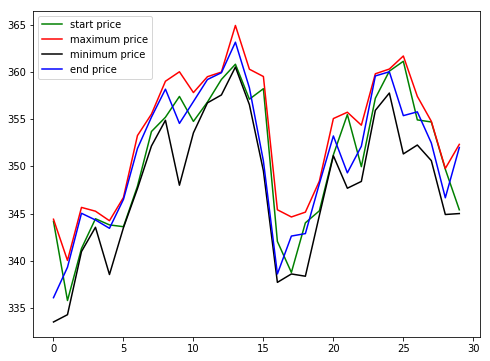

In [29]:
plt.figure(figsize=(8,6))
plt.plot(start,'g',label='start price')
plt.plot(maxi,'r',label='maximum price')
plt.plot(mini,'k',label='minimum price')
plt.plot(end,'b',label='end price')
plt.legend()

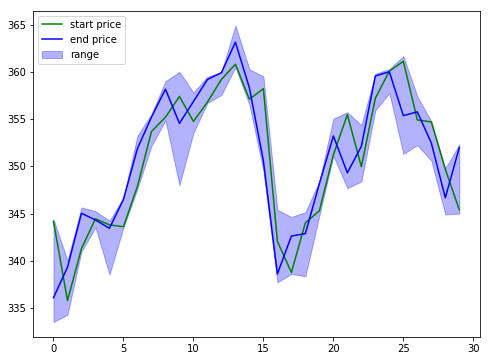

In [30]:
plt.figure(figsize=(8,6))
plt.plot(start,'g',label='start price')
plt.fill_between(np.arange(maxi.shape[0]),y1=mini,y2=maxi,edgecolor='b',facecolor='b',label='range',alpha=0.3)
plt.plot(end,'b',label='end price')
plt.legend()

### 收盘价最高的是哪一天, 开盘价最低的是哪一天？

In [31]:
end_max = np.argmax(end)
print(date[end_max])

start_min = np.argmin(start)
print(date[start_min])

16-02-2011
31-01-2011


### 计算周五的平均开盘价

In [32]:
index_friday = np.where(weekday == 5)
friday_start_mean = np.mean(start[index_friday])
friday_start_mean

350.2142857142857

### 计算周三的最高收盘价

In [33]:
index_wed = np.where(weekday == 3)
wed_end_max = np.max(end[index_wed])
wed_end_max

363.13

### 计算真实波动幅度均值（ATR, average true range）
1. ATR基于前20个交易日的最高价，最低价和收盘价进行计算
2. 计算公式为 
    $$ATR = \frac{(N-1)*PATR+TR}{N}$$
  PATR是前一个交易日的ATR值

In [34]:
N = 20
high = maxi[-N:]
low = mini[-N:]
previous_close = end[-N-1:-1] 

In [35]:
true_range = np.maximum(high-low,high-previous_close,previous_close-low)
## np.max用于求序列的最大值，np.maximum用于逐位比较，并取其大值

In [36]:
true_range

array([ 4.26,  2.77,  2.42,  5.  ,  3.75,  9.98,  7.68,  6.03,  6.78,
        5.55,  6.89,  8.04,  5.95,  7.67,  2.54, 10.36,  5.15,  4.16,
        4.87,  7.32])

In [37]:
atr = np.zeros(N)
atr[0] = np.mean(true_range) #赋第一个值进行初始化
for i in range(1,N):
    atr[i] = (N-1)*atr[i-1] + true_range[i]
    atr[i] = atr[i]/N
    
print(atr)

[5.8585     5.704075   5.53987125 5.51287769 5.4247338  5.65249711
 5.75387226 5.76767864 5.81829471 5.80487998 5.85913598 5.96817918
 5.96727022 6.05240671 5.87678637 6.10094705 6.0533997  5.95872972
 5.90429323 5.97507857]


### 把数据写入csv

In [31]:
data.to_csv('data_modified.csv')

In [38]:
data['name']=['nan']*start.shape[0]

In [39]:
data.to_csv('data_modified.csv')